Imports

In [9]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram


In [10]:
# Load dataset
insurance_dataset = pd.read_csv('/content/insurance.csv')

# Basic information about the dataset
print(insurance_dataset.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [11]:
print(insurance_dataset.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [12]:
print(insurance_dataset.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


In [13]:
# Checking for unique values and missing values
print(insurance_dataset['sex'].unique())
print(insurance_dataset.isnull().sum())

['female' 'male']
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


3. Data Visualization

In [14]:
# Data visualization
sns.set()

<ipython-input-15-1b49c8d47f11>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['age'])


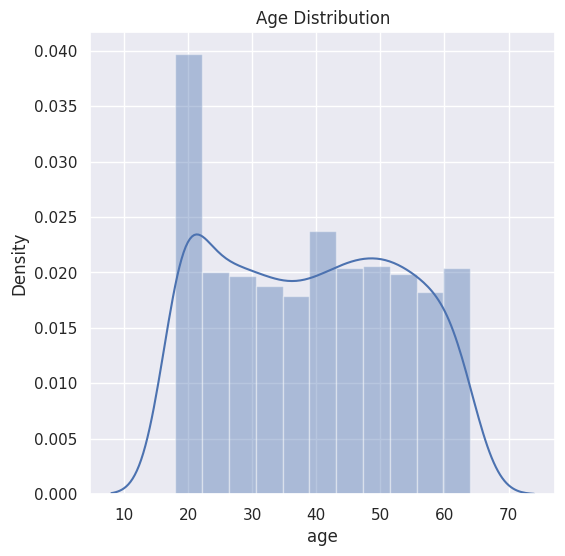

In [15]:
# Age Distribution
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

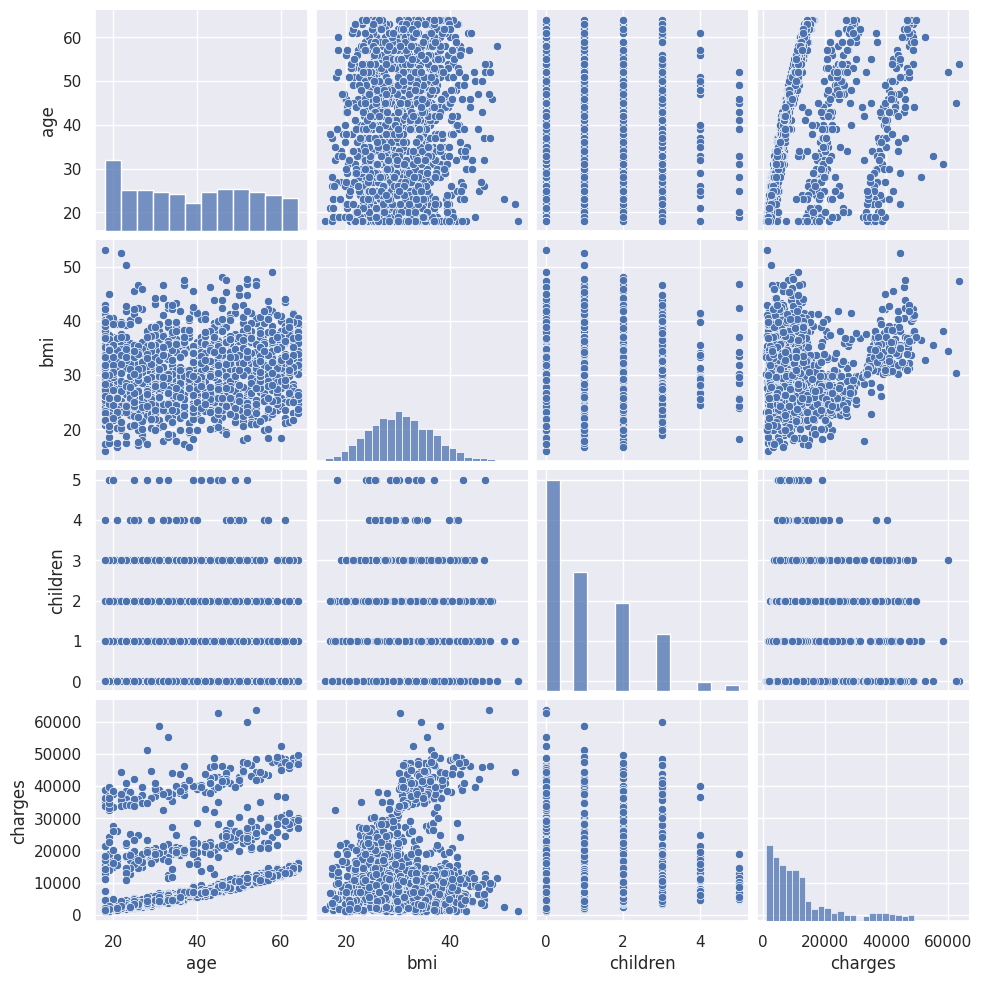

In [16]:
# Pairplot
sns.pairplot(insurance_dataset)
plt.show()



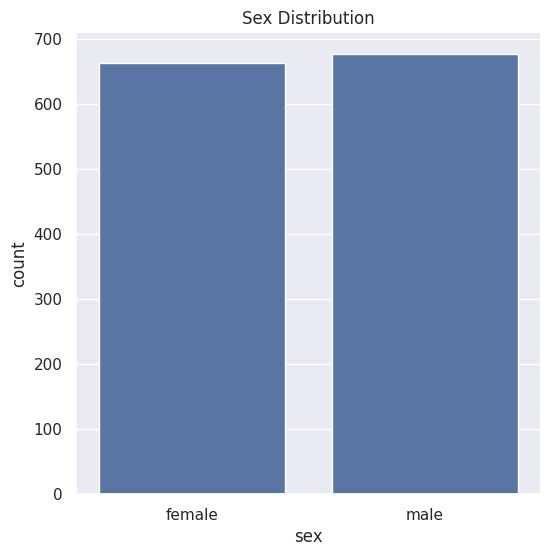

In [17]:
# Sex Distribution
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=insurance_dataset)
plt.title('Sex Distribution')
plt.show()

<ipython-input-18-de48435fbc01>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['bmi'])


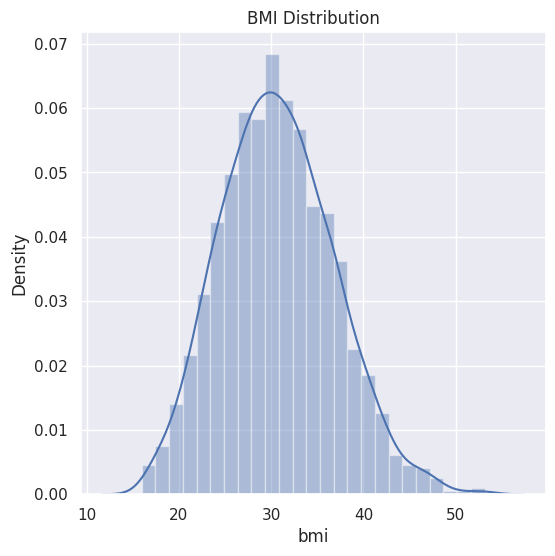

In [18]:
# BMI Distribution
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

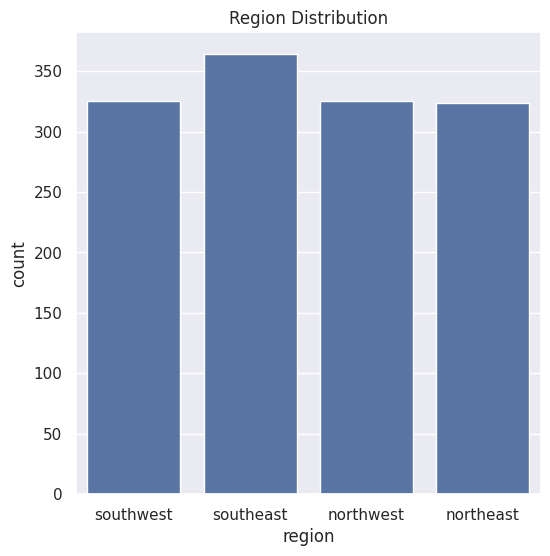

In [19]:
# Region Distribution
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=insurance_dataset)
plt.title('Region Distribution')
plt.show()

<ipython-input-20-c55b5bbaa891>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['charges'])


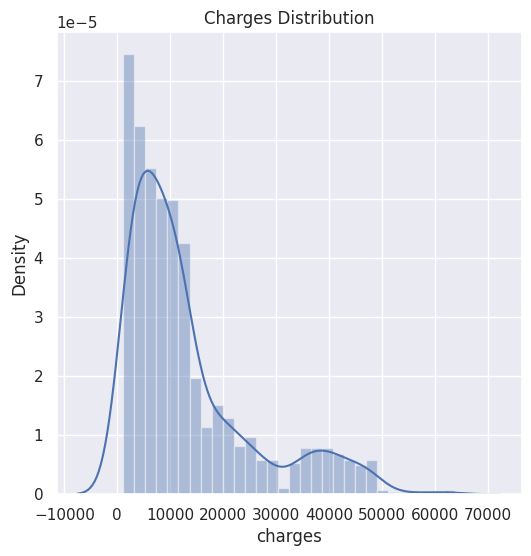

In [20]:
# Charges Distribution
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['charges'])
plt.title('Charges Distribution')
plt.show()

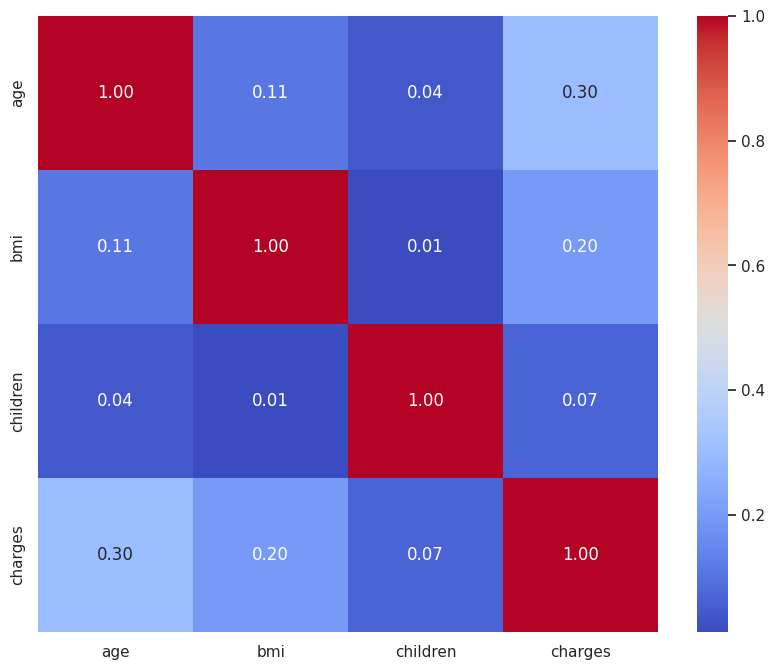

In [21]:
# Correlation heatmap
numeric_data = insurance_dataset.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

Data Preprocessing

In [22]:
# Data Pre-Processing
insurance_dataset.replace({'sex':{'male':0,'female':1}}, inplace=True)
insurance_dataset.replace({'smoker':{'yes':0,'no':1}}, inplace=True)
insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

X = insurance_dataset.drop(columns='charges', axis=1)
y = insurance_dataset['charges']



<ipython-input-22-bf740097d5f9>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({'sex':{'male':0,'female':1}}, inplace=True)
<ipython-input-22-bf740097d5f9>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({'smoker':{'yes':0,'no':1}}, inplace=True)
<ipython-input-22-bf740097d5f9>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to th

In [23]:
# Ensure all data is numeric
X = X.astype(float)
y = y.astype(float)

In [24]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


Data Scaling

In [25]:
# Standardization (Z-score Scaling)
scaler = StandardScaler()
insurance_dataset[['age', 'bmi']] = scaler.fit_transform(insurance_dataset[['age', 'bmi']])
print(insurance_dataset[['age', 'bmi']].head())

        age       bmi
0 -1.438764 -0.453320
1 -1.509965  0.509621
2 -0.797954  0.383307
3 -0.441948 -1.305531
4 -0.513149 -0.292556


In [26]:
# Min-Max Scaling (Normalization)
scaler = MinMaxScaler()
insurance_dataset[['age', 'bmi']] = scaler.fit_transform(insurance_dataset[['age', 'bmi']])
print(insurance_dataset[['age', 'bmi']].head())


        age       bmi
0  0.021739  0.321227
1  0.000000  0.479150
2  0.217391  0.458434
3  0.326087  0.181464
4  0.304348  0.347592


In [27]:
# Robust Scaling
scaler = RobustScaler()
insurance_dataset[['age', 'bmi']] = scaler.fit_transform(insurance_dataset[['age', 'bmi']])
print(insurance_dataset[['age', 'bmi']].head())

        age       bmi
0 -0.833333 -0.297708
1 -0.875000  0.401310
2 -0.458333  0.309616
3 -0.250000 -0.916344
4 -0.291667 -0.181006


Model Training

Linear Regression

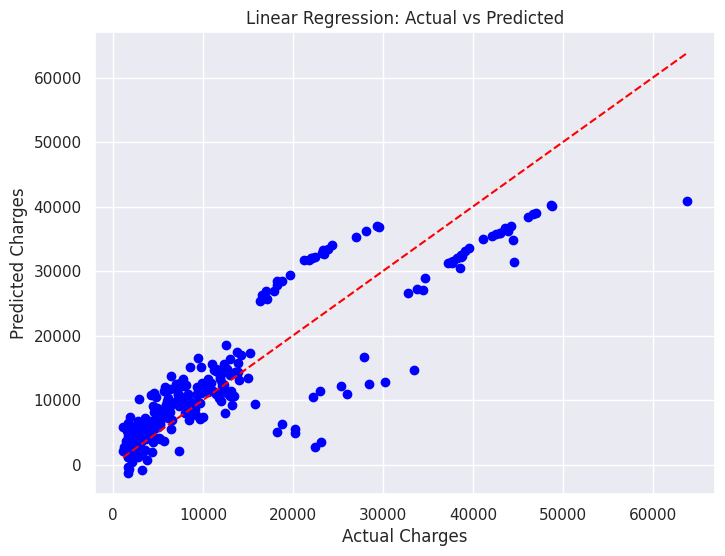

Linear Regression - MSE: 33685623.354144424, R-squared: 0.783021587162344


In [28]:
# Model Training - Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Plotting Actual vs Predicted values for Linear Regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Ideal line
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.grid(True)
plt.show()

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Linear Regression - MSE: {mse}, R-squared: {r2}")


Random Forest Regression

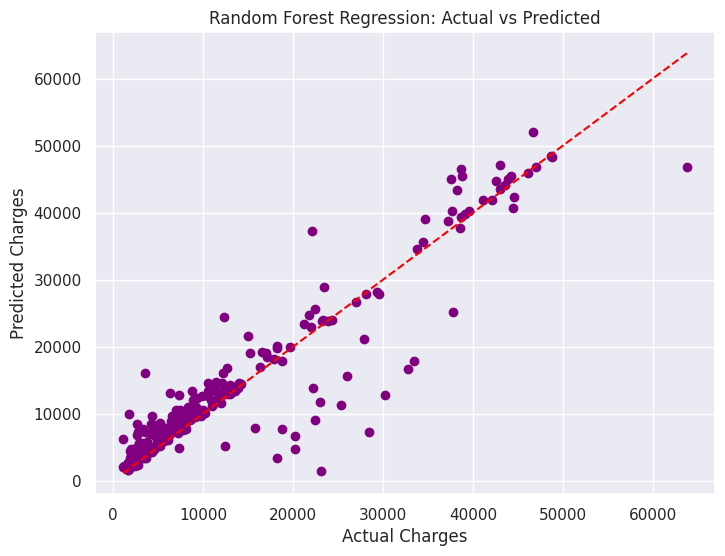

Random Forest Regression - RMSE: 4539.27, R^2: 0.87


In [29]:
# Random Forest Regression
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)

# Plotting Actual vs Predicted values for Random Forest
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, color='purple')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Ideal line
plt.title('Random Forest Regression: Actual vs Predicted')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.grid(True)
plt.show()

print(f"Random Forest Regression - RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_rf)):.2f}, R^2: {r2_score(y_test, y_pred_rf):.2f}")


SVM

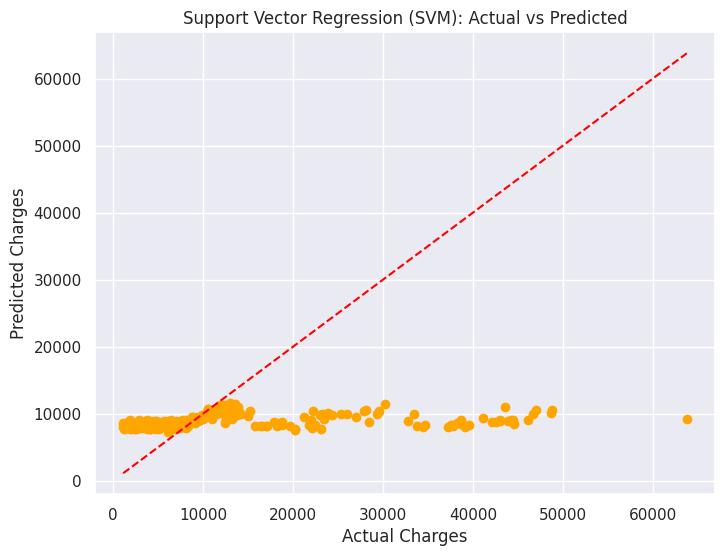

SVM Regression - MSE: 165628416.24997243, R-squared: -0.06685841912176249


In [30]:
# Support Vector Regression (SVM)
svm_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Plotting Actual vs Predicted values for Support Vector Regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_svm, color='orange')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Ideal line
plt.title('Support Vector Regression (SVM): Actual vs Predicted')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.grid(True)
plt.show()

mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)
print(f"SVM Regression - MSE: {mse_svm}, R-squared: {r2_svm}")


Decision Tree Regression

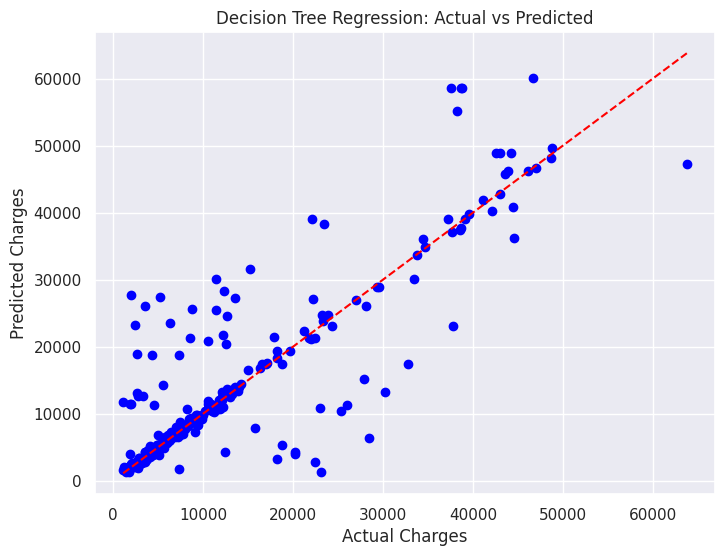

Decision Tree Regression - MSE: 46760484.62826187, R-squared: 0.6988027909861558


In [31]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

# Initialize and train the Decision Tree Regressor
decision_tree_regressor = DecisionTreeRegressor(random_state=42)
decision_tree_regressor.fit(X_train, y_train)

# Predict the results
y_pred_dt = decision_tree_regressor.predict(X_test)

# Plotting Actual vs Predicted values for Decision Tree Regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_dt, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Ideal line
plt.title('Decision Tree Regression: Actual vs Predicted')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.grid(True)
plt.show()

# Calculating and displaying the MSE and R-squared score for Decision Tree
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print(f"Decision Tree Regression - MSE: {mse_dt}, R-squared: {r2_dt}")


Mean Squared Error: 22812669.85234084
R-squared: 0.8530572866320028


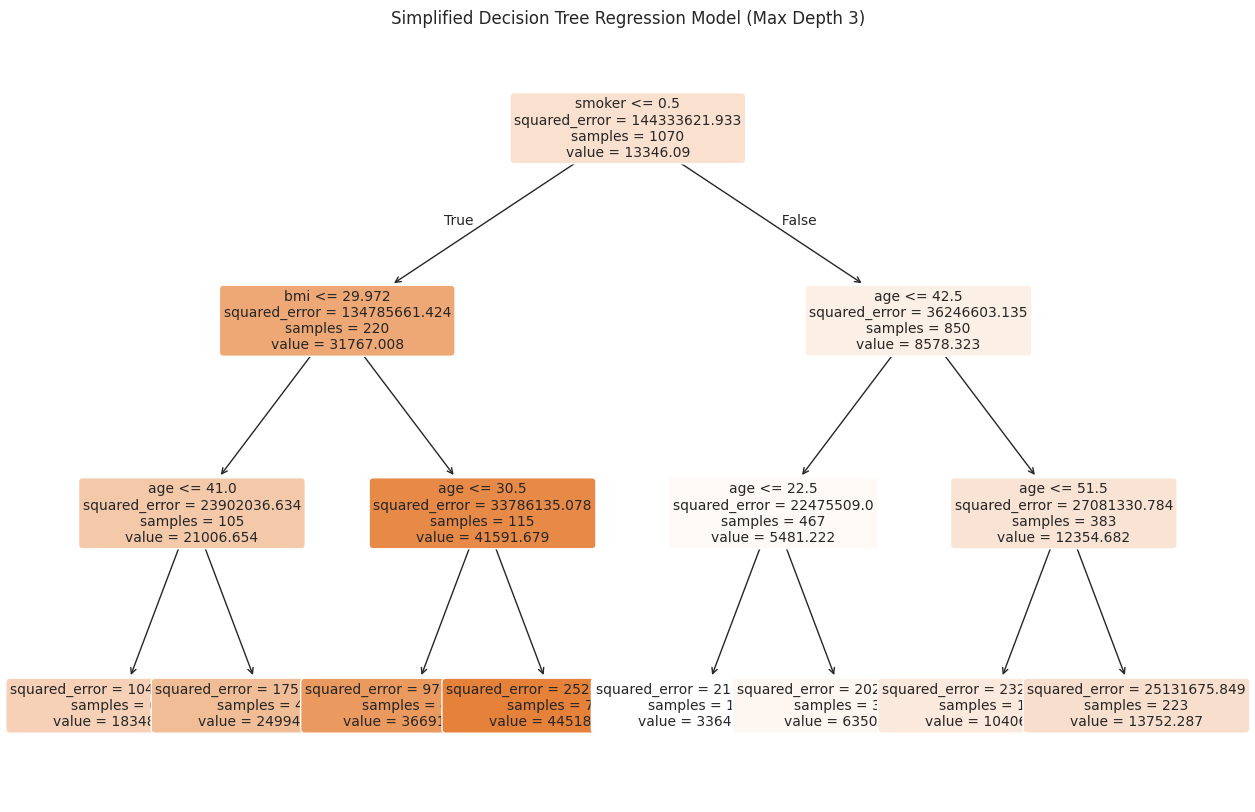

In [32]:
# Initialize the Decision Tree Regressor model with max_depth to limit the tree complexity
decision_tree_regressor = DecisionTreeRegressor(max_depth=3, random_state=42)

# Train the model
decision_tree_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = decision_tree_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plotting the simplified Decision Tree graph
plt.figure(figsize=(15, 10))
plot_tree(decision_tree_regressor, filled=True, feature_names=X.columns, rounded=True, fontsize=10)
plt.title("Simplified Decision Tree Regression Model (Max Depth 3)")
plt.show()


K-Nearest Neighbors (KNN) Regression

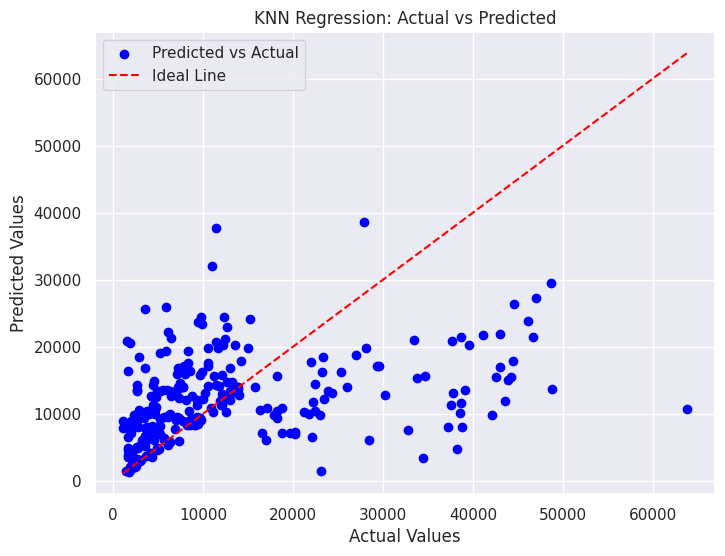

KNN Regression - MSE: 137555031.566095, R-squared: 0.11397001286684316


In [33]:
# Import KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor

# Initialize and train the KNN Regressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)  # You can adjust 'n_neighbors' as needed
knn_regressor.fit(X_train, y_train)

# Predict the results
y_pred_knn = knn_regressor.predict(X_test)

# Plotting Actual vs Predicted values for KNN Regression
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_knn, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Line')  # Ideal line
plt.title('KNN Regression: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

# Calculating and displaying the MSE and R-squared score for KNN Regression
from sklearn.metrics import mean_squared_error, r2_score
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
print(f"KNN Regression - MSE: {mse_knn}, R-squared: {r2_knn}")


Naive bayes

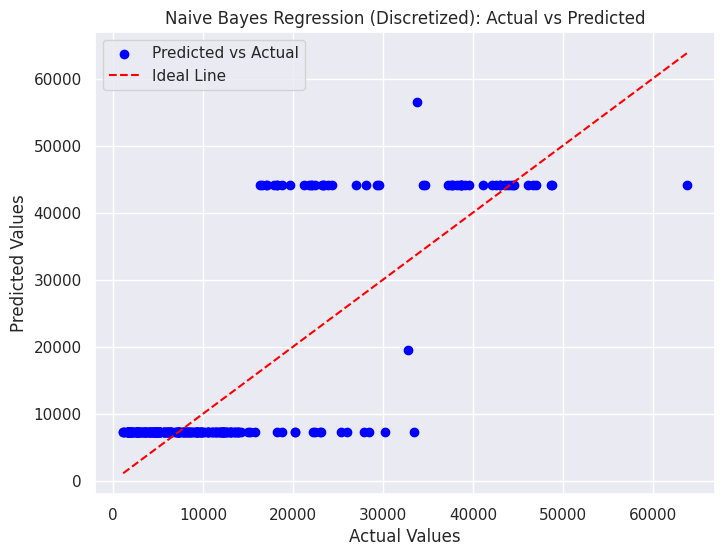

Naive Bayes Regression - MSE: 78028569.13774109, R-squared: 0.49739641420596237


In [36]:
# Import GaussianNB
from sklearn.naive_bayes import GaussianNB
import numpy as np

# Discretize the target variable into bins for classification purposes
num_bins = 5  # Adjust the number of bins based on your dataset
bin_edges = np.linspace(y_train.min(), y_train.max(), num_bins + 1)  # Create bin edges
y_train_binned = np.digitize(y_train, bins=bin_edges[:-1])  # Use bins excluding the last edge
y_test_binned = np.digitize(y_test, bins=bin_edges[:-1])

# Train the Naive Bayes classifier
nb_regressor = GaussianNB()
nb_regressor.fit(X_train, y_train_binned)

# Predict the binned values and convert them back to continuous values (using bin midpoints)
y_pred_binned = nb_regressor.predict(X_test)
bin_midpoints = (bin_edges[:-1] + bin_edges[1:]) / 2  # Calculate midpoints of bins
y_pred_nb = np.clip(y_pred_binned - 1, 0, len(bin_midpoints) - 1)  # Ensure valid indices
y_pred_nb = bin_midpoints[y_pred_nb]

# Plotting Actual vs Predicted values for Naive Bayes Regression
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_nb, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Line')  # Ideal line
plt.title('Naive Bayes Regression (Discretized): Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

# Calculating and displaying the MSE and R-squared score for Naive Bayes Regression
from sklearn.metrics import mean_squared_error, r2_score
mse_nb = mean_squared_error(y_test, y_pred_nb)
r2_nb = r2_score(y_test, y_pred_nb)
print(f"Naive Bayes Regression - MSE: {mse_nb}, R-squared: {r2_nb}")


Ensemble learning model

xgboost

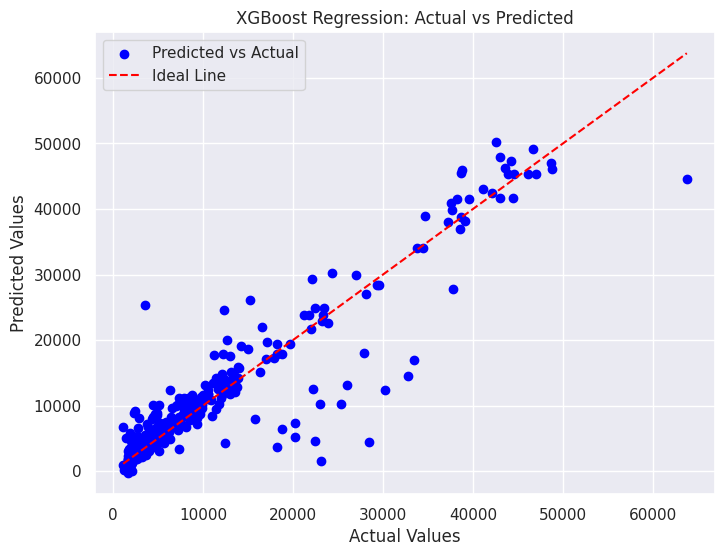

XGBoost Regression - MSE: 24128510.58168258, R-squared: 0.8445815927136182


In [37]:
# Import XGBoost Regressor
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the XGBoost Regressor
xgboost_regressor = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgboost_regressor.fit(X_train, y_train)

# Predict the results
y_pred_xgb = xgboost_regressor.predict(X_test)

# Plotting Actual vs Predicted values for XGBoost Regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_xgb, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Line')  # Ideal line
plt.title('XGBoost Regression: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

# Calculating and displaying the MSE and R-squared score for XGBoost Regression
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"XGBoost Regression - MSE: {mse_xgb}, R-squared: {r2_xgb}")


AdaBoost

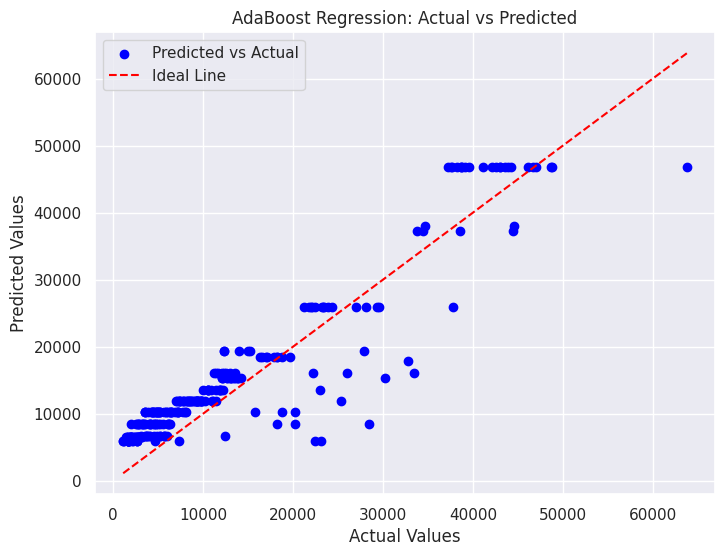

AdaBoost Regression - MSE: 26851621.901964236, R-squared: 0.8270412798613618


In [38]:
# Import AdaBoost Regressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the AdaBoost Regressor
# We use DecisionTreeRegressor as the base learner (a shallow tree)
ada_boost_regressor = AdaBoostRegressor(
    estimator=DecisionTreeRegressor(max_depth=3),  # Use `estimator` instead of `base_estimator`
    n_estimators=100,
    random_state=42
)
ada_boost_regressor.fit(X_train, y_train)

# Predict the results
y_pred_ada = ada_boost_regressor.predict(X_test)

# Plotting Actual vs Predicted values for AdaBoost Regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_ada, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Line')  # Ideal line
plt.title('AdaBoost Regression: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

# Calculating and displaying the MSE and R-squared score for AdaBoost Regression
mse_ada = mean_squared_error(y_test, y_pred_ada)
r2_ada = r2_score(y_test, y_pred_ada)
print(f"AdaBoost Regression - MSE: {mse_ada}, R-squared: {r2_ada}")


###Voting

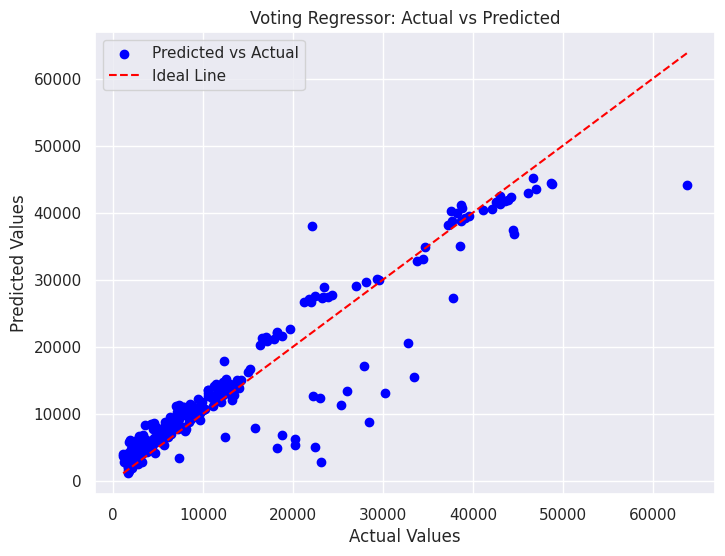

Voting Regressor - MSE: 20211511.984132785, R-squared: 0.8698120635838897


In [39]:
# Import necessary libraries
from sklearn.ensemble import VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Initialize individual regressors
regressor1 = DecisionTreeRegressor(max_depth=3, random_state=42)
regressor2 = RandomForestRegressor(n_estimators=100, random_state=42)
regressor3 = LinearRegression()

# Initialize and train the Voting Regressor
voting_regressor = VotingRegressor(estimators=[
    ('dt', regressor1),
    ('rf', regressor2),
    ('lr', regressor3)
])
voting_regressor.fit(X_train, y_train)

# Predict the results
y_pred_voting = voting_regressor.predict(X_test)

# Plotting Actual vs Predicted values for Voting Regressor
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_voting, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Line')  # Ideal line
plt.title('Voting Regressor: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

# Calculating and displaying the MSE and R-squared score for Voting Regressor
mse_voting = mean_squared_error(y_test, y_pred_voting)
r2_voting = r2_score(y_test, y_pred_voting)
print(f"Voting Regressor - MSE: {mse_voting}, R-squared: {r2_voting}")


###Bagging

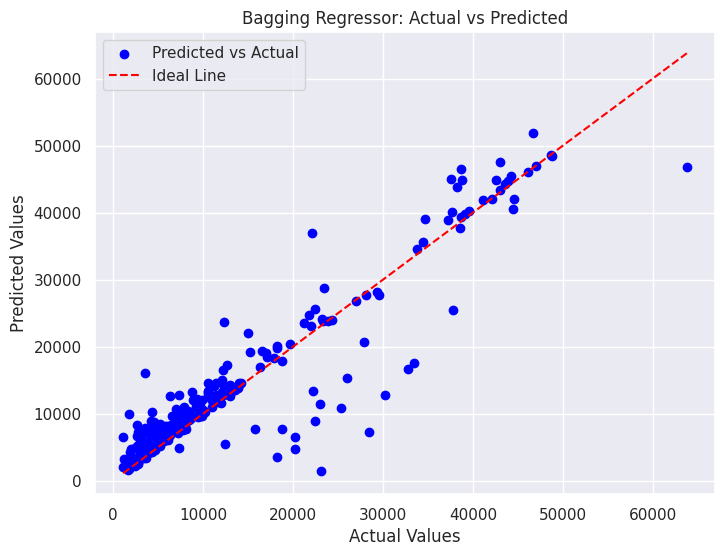

Bagging Regressor - MSE: 20786001.52541442, R-squared: 0.8661116176236464


In [40]:
# Import necessary libraries
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Bagging Regressor (using the default base estimator, i.e., DecisionTreeRegressor)
bagging_regressor = BaggingRegressor(
    n_estimators=100,
    random_state=42
)

# Train the Bagging Regressor
bagging_regressor.fit(X_train, y_train)

# Predict the results
y_pred_bagging = bagging_regressor.predict(X_test)

# Plotting Actual vs Predicted values for Bagging Regressor
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_bagging, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Line')  # Ideal line
plt.title('Bagging Regressor: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

# Calculating and displaying the MSE and R-squared score for Bagging Regressor
mse_bagging = mean_squared_error(y_test, y_pred_bagging)
r2_bagging = r2_score(y_test, y_pred_bagging)
print(f"Bagging Regressor - MSE: {mse_bagging}, R-squared: {r2_bagging}")


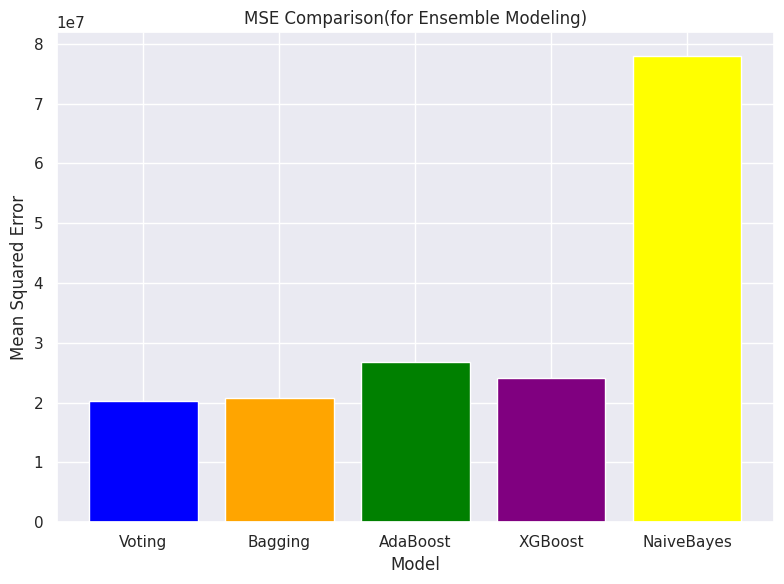

Voting - MSE: 20211511.984132785
Bagging - MSE: 20786001.52541442
AdaBoost - MSE: 26851621.901964236
XGBoost  - MSE: 24128510.58168258
Naive Bayes  - MSE: 78028569.13774109


In [41]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
# Models for comparison
models = ['Voting', 'Bagging', 'AdaBoost', 'XGBoost','NaiveBayes']

# MSE values
mse_values = [mse_voting, mse_bagging, mse_ada, mse_xgb, mse_nb]

# Create a figure for the comparison
plt.figure(figsize=(8, 6))

# Bar chart for MSE comparison
plt.bar(models, mse_values, color=['blue', 'orange', 'green', 'purple','yellow'])
plt.title('MSE Comparison(for Ensemble Modeling)')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.grid(True, axis='y')

# Show the plot
plt.tight_layout()
plt.show()

# Print the calculated MSE values for reference
print(f"Voting - MSE: {mse_voting}")
print(f"Bagging - MSE: {mse_bagging}")
print(f"AdaBoost - MSE: {mse_ada}")
print(f"XGBoost  - MSE: {mse_xgb}")
print(f"Naive Bayes  - MSE: {mse_nb}")



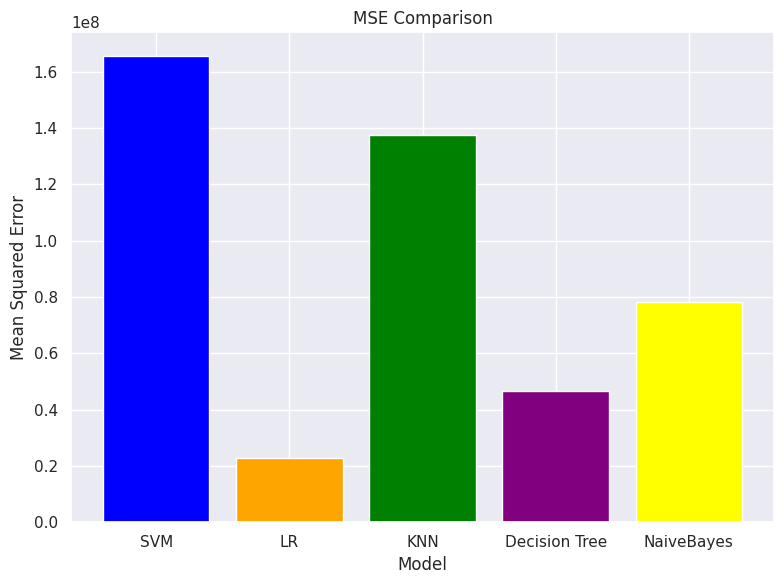

SVM - MSE: 165628416.24997243
Linear Regression - MSE: 22812669.85234084
KNN - MSE: 137555031.566095
Decision tree  - MSE: 46760484.62826187
Naive Bayes  - MSE: 78028569.13774109


In [42]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
# Models for comparison
models = ['SVM', 'LR', 'KNN', 'Decision Tree','NaiveBayes']

# MSE values
mse_values = [mse_svm,mse,mse_knn,mse_dt,mse_nb]

# Create a figure for the comparison
plt.figure(figsize=(8, 6))

# Bar chart for MSE comparison
plt.bar(models, mse_values, color=['blue', 'orange', 'green', 'purple','yellow'])
plt.title('MSE Comparison')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.grid(True, axis='y')

# Show the plot
plt.tight_layout()
plt.show()

# Print the calculated MSE values for reference
print(f"SVM - MSE: {mse_svm}")
print(f"Linear Regression - MSE: {mse}")
print(f"KNN - MSE: {mse_knn}")
print(f"Decision tree  - MSE: {mse_dt}")
print(f"Naive Bayes  - MSE: {mse_nb}")



In [ ]:
!mkdir insurance-prediction

In [ ]:
%cd insurance-prediction

/content/insurance-prediction


In [2]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
@st.cache
def load_data():
    data = pd.read_csv('insurance.csv')
    data.replace({'sex': {'male': 0, 'female': 1},
                  'smoker': {'yes': 0, 'no': 1},
                  'region': {'southeast': 0, 'southwest': 1, 'northeast': 2, 'northwest': 3}}, inplace=True)
    return data

# Preprocess data
def preprocess_data(data):
    X = data.drop(columns='charges', axis=1)
    y = data['charges']
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test, scaler

# Train model
def train_model(X_train, y_train):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

# Streamlit App
st.title("Medical Insurance Charge Prediction")

# Load and preprocess data
insurance_data = load_data()
X_train, X_test, y_train, y_test, scaler = preprocess_data(insurance_data)

# Train the model
model = train_model(X_train, y_train)

# Sidebar for user input
st.sidebar.header("Input Features")
age = st.sidebar.slider("Age", int(insurance_data["age"].min()), int(insurance_data["age"].max()), 30)
sex = st.sidebar.selectbox("Sex", ["Male", "Female"])
bmi = st.sidebar.slider("BMI", float(insurance_data["bmi"].min()), float(insurance_data["bmi"].max()), 25.0)
children = st.sidebar.slider("Children", int(insurance_data["children"].min()), int(insurance_data["children"].max()), 0)
smoker = st.sidebar.selectbox("Smoker", ["Yes", "No"])
region = st.sidebar.selectbox("Region", ["Southeast", "Southwest", "Northeast", "Northwest"])

# Prepare input data
input_data = np.array([[
    age,
    1 if sex == "Female" else 0,
    bmi,
    children,
    0 if smoker == "Yes" else 1,
    {"Southeast": 0, "Southwest": 1, "Northeast": 2, "Northwest": 3}[region]
]])
input_data_scaled = scaler.transform(input_data)

# Predict
if st.sidebar.button("Predict"):
    prediction = model.predict(input_data_scaled)
    st.subheader("Predicted Insurance Charges:")
    st.write(f"${prediction[0]:,.2f}")

# Display model performance
if st.checkbox("Show Model Performance"):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    st.write(f"Mean Squared Error (MSE): {mse:.2f}")
    st.write(f"R-Squared Score: {r2:.2f}")

Writing app.py


In [3]:
from google.colab import files
uploaded = files.upload()

Saving insurance.csv to insurance.csv


In [4]:
!rm requirements.txt

rm: cannot remove 'requirements.txt': No such file or directory


In [5]:
%%writefile requirements.txt
pandas
numpy
matplotlib
seaborn
scikit-learn
imbalanced-learn
xgboost
tabulate
streamlit
joblib

Writing requirements.txt


In [6]:
!cat requirements.txt

pandas
numpy
matplotlib
seaborn
scikit-learn
imbalanced-learn
xgboost
tabulate
streamlit
joblib


In [7]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 86.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 94.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.3 MB/s eta 0:00:00


In [8]:
from google.colab import files

# Download app.py
files.download('app.py')

# Download requirements.txt
files.download('requirements.txt')

# Download dataset (if uploaded)
files.download('insurance.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>